In [1]:
"""------------------------------------------------------
Name: Rajkumar Conjeevaram Mohan
Email: rajkumarcm@yahoo.com
Program: Linear Discriminant Anlaysis for Classification
Date: March 19, 2021
------------------------------------------------------"""

'------------------------------------------------------\nName: Rajkumar Conjeevaram Mohan\nEmail: rajkumarcm@yahoo.com\nProgram: Linear Discriminant Anlaysis for Classification\n------------------------------------------------------'

In [2]:
import numpy as np
from scipy.stats import multivariate_normal as m_normal
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# Random statistical parameters for sampling

mu = [[2.5, 2.5], [-1.5, -1.5]]
cov = [np.eye(2), np.eye(2)*1.2]
prior_c = [0.5, 0.5]
n_samples = 40

In [4]:
# Draw samples from multivariate normal distribution

x = []
y = []
for i in range(len(mu)):
    x.append(np.random.multivariate_normal(mean=mu[i], cov=cov[i], size=n_samples))
    y.append([i]*n_samples)

samples = np.vstack(x)
labels = np.hstack(y)

In [5]:
# Estimate the paramters of the data
# LDA assumes covariance is shared across all clusters
est_mean = []
est_cov2 = []
for c in range(len(mu)):
    tmp_mu = np.mean(x[c], axis=0).reshape([1, -1])
    est_mean.append(tmp_mu)
    est_cov2.append(1/n_samples * (x[c] - est_mean[c]).T @ (x[c] - est_mean[c]))
est_cov = est_cov2[0]

# Precision matrix
prec = np.linalg.inv(est_cov)

# gamma and beta parameters that are part of mahalanobis distance
gamma_c = []
beta_c = []
for c in range(len(mu)):
    gamma_c.append(-0.5 * est_mean[c] @ prec @ est_mean[c].T + np.log(prior_c[c]))
    beta_c.append(prec @ est_mean[c].T)

In [6]:
prob = np.zeros([n_samples * len(mu), 2])
for i in range(n_samples * len(mu)):
    for c in range(len(mu)):
        prob[i, c] = np.exp(beta_c[c].T @ samples[i] + gamma_c[c])
    prob[i] /= np.sum(prob[i])
pred = np.argmax(prob, axis=1)
n_match = np.sum(pred == labels)
acc = (n_match/(n_samples * len(mu))) * 100
print("accuracy: %.3f%%" % acc)

accuracy: 100.000%


In [7]:
# Plot the contour and data points

x1_min, x2_min = np.min(samples, axis=0)
x1_max, x2_max = np.max(samples, axis=0)
x1 = np.linspace(x1_min-1, x1_max+1, 100)
x2 = np.linspace(x2_min-1, x2_max+1, 100)
x1, x2 = np.meshgrid(x1, x2)
xy = np.c_[x1.ravel(), x2.ravel()]

xy_p = np.zeros([10000, 2])
for i in range(10000):
    for c in range(len(mu)):
        xy_p[i, c] = np.exp(beta_c[c].T @ xy[i] + gamma_c[c])
    xy_p[i] /= np.sum(xy_p[i])
xy_z = np.argmax(xy_p, axis=1)

xy_pdf = np.zeros([10000, 2])
xy_pdf[:, 0] = m_normal.pdf(x=xy, mean=est_mean[0].ravel(), cov=est_cov2[0])
xy_pdf[:, 1] = m_normal.pdf(x=xy, mean=est_mean[1].ravel(), cov=est_cov2[1])


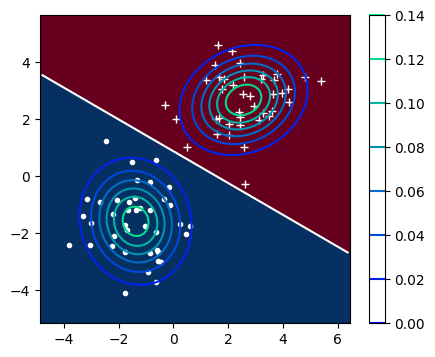

In [9]:
fig, axes = plt.subplots(figsize=(5, 4))
plt.pcolormesh(x1, x2, xy_z.reshape([100, 100]), cmap="RdBu")
plt.contour(x1, x2, xy_p[:, 0].reshape([100, 100]), levels=1, colors='white')
plt.plot(x[0][:, 0], x[0][:, 1], '+w')
plt.plot(x[1][:, 0], x[1][:, 1], '.w')
plt.contour(x1, x2, xy_pdf[:, 0].reshape([100, 100]), cmap='winter')
plt.contour(x1, x2, xy_pdf[:, 1].reshape([100, 100]), cmap='winter')
plt.colorbar()